In [67]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.api as sm
from scipy.optimize import minimize

# Problem 1: Binary Logit Model

In [55]:
df = pd.read_csv('C:\\Users\\moham\\My Drive\\Projects\\Structural Econometrics Projects\\Topics in Advanced Econometrics\\2- Logit\\commute_binary.csv')

In [56]:
df['output'] = (df['mode'] == 'car').astype(int)
df['Married'] = (df['marital_status'] == 'married').astype(int)

In [57]:
df.columns

Index(['id', 'mode', 'time.car', 'cost.car', 'time.bus', 'cost.bus',
       'price_gas', 'snowfall', 'construction', 'bus_detour', 'age', 'income',
       'marital_status', 'output', 'Married'],
      dtype='object')

In [59]:
# Define the dependent variable
y = df['output']

# Define the independent variables
X = df[['time.car', 'cost.car', 'time.bus']]

# Add a constant term to the independent variables
X = sm.add_constant(X)

# Fit the binary logit model
logit_model_1 = sm.Logit(y, X)
result1 = logit_model_1.fit()
# Print the summary of the model
print(result1.summary())

Optimization terminated successfully.
         Current function value: 0.600470
         Iterations 6
                           Logit Regression Results                           
Dep. Variable:                 output   No. Observations:                 1000
Model:                          Logit   Df Residuals:                      996
Method:                           MLE   Df Model:                            3
Date:                Mon, 29 Jul 2024   Pseudo R-squ.:                  0.1205
Time:                        17:18:47   Log-Likelihood:                -600.47
converged:                       True   LL-Null:                       -682.74
Covariance Type:            nonrobust   LLR p-value:                 1.914e-35
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          2.2333      0.347      6.443      0.000       1.554       2.913
time.car      -0.3322      0.

In [19]:
predicted_values = (result1.predict(X)).apply(lambda x: 0 if x < 0.5 else 1)
# Compare predicted values with actual values
accuracy = (predicted_values == df['output']).mean()

# Calculate success rate
success_rate = accuracy * 100

success_rate

66.8

## Marginal Effects
By ME, we mean the effect of a change in each attribute on the probability of choosing to drive car.

From the theory, we know that the marginal effects of each attribute on the probability of choosing to derive is:
$$
\beta_z P_{n i}\left(1-P_{n i}\right)
$$

In [20]:
predictions = result1.predict(X)

coefficients = result1.params
timecar_coefficient = coefficients['time.car']
timebus_coefficient = coefficients['time.bus']
costcar_coefficient = coefficients['cost.car']

df['ME_timecar'] = timecar_coefficient * predictions * (1 - predictions)
df['ME_timebus'] = timebus_coefficient * predictions * (1 - predictions)
df['ME_costcar'] = costcar_coefficient * predictions * (1 - predictions)

In [21]:
new_columns = ['ME_timecar', 'ME_timebus', 'ME_costcar']
summary = df[new_columns].describe().loc[['min', '25%', '50%', '75%', 'max', 'mean']]
summary

,ME_timecar,ME_timebus,ME_costcar
min,-0.083054,0.000963,-0.519289
25%,-0.081579,0.024823,-0.510069
50%,-0.076326,0.030459,-0.477225
75%,-0.062203,0.032555,-0.388920
max,-0.002413,0.033144,-0.015087
mean,-0.069001,0.027536,-0.431426


These Marginal effects on the mean are very similar to the marginal effects in a LPM. Though, these MEs have heterogeneity and change around the mean. Therefore, this is a better model to work with.

## Finding the Dollor value of each attribute

As costcar attribute is in money terms. We have the MU of money. Therefore, just divide by this coeff.

In [22]:
dollor_value_of_time_car = np.abs(timecar_coefficient / costcar_coefficient) * 60
dollor_value_of_time_bus = np.abs(timebus_coefficient / costcar_coefficient) * 60
print(f"Dollar Value of Time Bus: ${dollor_value_of_time_bus:.2f}")
print(f"Dollar Value of Time Car: ${dollor_value_of_time_car:.2f}")

Dollar Value of Time Bus: $3.83
Dollar Value of Time Car: $9.60


This is willingness to pay by an agent to decrease time for each for 1 hour.

## Logit model with individual attributes

$$
V = \beta_0+\frac{\beta_1}{I_n} C_{n c}+\beta_2 T_{n c}+\beta_3 T_{n b}

$$

In [23]:
# Define the dependent variable
y = df['output']

df['cost.car_Norm'] = df['cost.car'] / df['income']
# Define the independent variables
X = df[['time.car', 'cost.car_Norm', 'time.bus']]

# Add a constant term to the independent variables
X = sm.add_constant(X)

# Fit the binary logit model
logit_model2 = sm.Logit(y, X)
result2 = logit_model2.fit()
# Print the summary of the model
print(result2.summary())

Optimization terminated successfully.
         Current function value: 0.597449
         Iterations 6
                           Logit Regression Results                           
Dep. Variable:                 output   No. Observations:                 1000
Model:                          Logit   Df Residuals:                      996
Method:                           MLE   Df Model:                            3
Date:                Sun, 28 Jul 2024   Pseudo R-squ.:                  0.1249
Time:                        09:59:48   Log-Likelihood:                -597.45
converged:                       True   LL-Null:                       -682.74
Covariance Type:            nonrobust   LLR p-value:                 9.498e-37
                    coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------
const             2.2654      0.331      6.842      0.000       1.616       2.914
time.car         -0.

Then, in this case, the coefficient of cost.car is basically heterogeneous. Some summary facts on it are as follows:

In [30]:
predictions = result2.predict(X)

coefficients = result2.params
costcar_coefficient = coefficients['cost.car_Norm']

df['cost.car_heterogenous'] = costcar_coefficient / df['income']
summary = df['cost.car_heterogenous'].describe().loc[['min', '25%', '50%', '75%', 'max', 'mean']].round(2)
print(summary)
print(result1.params['cost.car'].round(2))

min    -4.47
25%    -2.44
50%    -2.15
75%    -1.92
max    -1.49
mean   -2.21
Name: cost.car_heterogenous, dtype: float64
-2.08


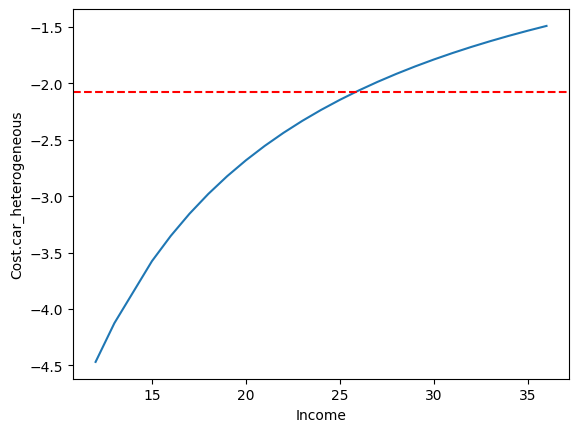

In [37]:
import matplotlib.pyplot as plt

# Sort the dataframe by income in ascending order
sorted_df = df.sort_values('income')

# Plot the data
plt.plot(sorted_df['income'], sorted_df['cost.car_heterogenous'])

# Add a vertical line at a specific x-coordinate
plt.axhline(y=result1.params['cost.car'].round(2), color='r', linestyle='--')

# Set the x-axis label
plt.xlabel('Income')

# Set the y-axis label
plt.ylabel('Cost.car_heterogeneous')

# Show the plot
plt.show()

So, higher income is associated with lower absolute value of MU for costcar. In other words, the higher the income, the lower the effect of costcar variable on the utility of our agent. This actually makes sense as with higher income, you should care less about the costs. Also, the horizontal red line is the homogenous level for this coefficient solved for in the model with no heterogenous attributes.

Now, first, let us find the MU of income for three different income levels, 15000, 25000 and 35000. Also, the dollor value of time for both bus and car.

In [45]:
income_levels = [15,25,35]
MU_cost_het = costcar_coefficient/income_levels
timecar_coefficient = coefficients['time.car']
timebus_coefficient = coefficients['time.bus']

df_income_levels = pd.DataFrame({'Income Level': income_levels, 'MU_cost_het': MU_cost_het})
df_income_levels['Value_of_time_car'] = np.abs(timecar_coefficient / MU_cost_het * 60)
df_income_levels['Value_of_time_bus'] = np.abs(timebus_coefficient / MU_cost_het * 60)
df_income_levels.round(2)

,Income Level,MU_cost_het,Value_of_time_car,Value_of_time_bus
0,15,-3.58,5.63,2.28
1,25,-2.15,9.38,3.80
2,35,-1.53,13.13,5.32


This means that, the higher the income, the higher the willingness to pay to decrease time of travel by 1 hour. One can see that, making things heterogenous changes everything.

# Problem 2: Multinomial Logit Model

The model we have in mind is:

$$
V_{n, bike}= \beta_1 C_{n,bike}+\beta_{bike} T_{n,bike}\\
V_{n, bus}= \alpha_{bus} + \beta_1 C_{n,bus}+\beta_{bus} T_{n,bus}\\
V_{n, car}= \alpha_{car} + \beta_1 C_{n,car}+\beta_{car} T_{n,car}\\
V_{n, walk}= \alpha_{walk} + \beta_1 C_{n,walk}+\beta_{walk} T_{n,walk}
$$

So, intercept and the coefficient of time is dependent on the choice variable, yet the cost coeff is the same for all. 

The data to use should have $x_{ni}$ for the attributes for each agent and alternative. These attributes are cost and time for now. So, these attributes are eight for each observation. The format in mind for the data is that we expand each observation into four, and have time, cost and choice columns.

We can see that the parameter space is eight dimensional.

In [164]:
df = pd.read_csv('C:\\Users\\moham\\My Drive\\Projects\\Structural Econometrics Projects\\Topics in Advanced Econometrics\\2- Logit\\commute_multinomial.csv')

In [165]:
# List of modes
modes = ['bike', 'bus', 'car', 'walk']

# Reshape the DataFrame
rows = []
for index, row in df.iterrows():
    for mode in modes:
        rows.append({
            'id': row['id'],
            'mode': mode,
            'age': row['age'],
            'income': row['income'],
            'marital_status': row['marital_status'],
            'time': row[f'time.{mode}'],
            'cost': row[f'cost.{mode}'],
            'choice': 1 if row['mode'] == mode else 0
        })

df_long = pd.DataFrame(rows)

df_long['Married'] = (df_long['marital_status'] == 'married').astype(int)
# Reorder columns

for mode in modes:
    df_long[f'dummy_{mode}'] = (df_long['mode'] == mode).astype(int)
    df_long[f'time_{mode}'] = df_long['time'] * df_long[f'dummy_{mode}']

In [166]:
df_long.head()

,id,mode,age,income,marital_status,time,cost,choice,Married,dummy_bike,time_bike,dummy_bus,time_bus,dummy_car,time_car,dummy_walk,time_walk
0,1,bike,33,28,married,20,0.00,0,1,1,20,0,0,0,0,0,0
1,1,bus,33,28,married,20,0.00,1,1,0,0,1,20,0,0,0,0
2,1,car,33,28,married,16,0.82,0,1,0,0,0,0,1,16,0,0
3,1,walk,33,28,married,55,0.00,0,1,0,0,0,0,0,0,1,55
4,2,bike,25,28,single,15,0.00,0,0,1,15,0,0,0,0,0,0


The log-likelihood function of this model is as follows:

$$
\ln L(\theta \mid y, \boldsymbol{X})=\sum_{n=1}^N \sum_{i=1}^J y_{n i} \ln \left[\frac{e^{\alpha_i + \beta_c C_{n,i} + \beta_j T_{n,i}}}{\sum_j e^{\alpha_j + \beta_c C_{n,j} + \beta_j T_{n,j}}}\right]
$$

Now, we define a function, which, given the data and a set of paremters, solve for this log-likelihood function.

In [167]:
def loglikelihood(params):
    # Define the dependent variable
    params = np.insert(params, 0, 0)
    y = df_long['choice']
    X = df_long[['dummy_bike', 'dummy_bus', 'dummy_car', 'dummy_walk',
              'cost', 
              'time_bike', 'time_bus', 'time_car', 'time_walk']]
    
    df_long['util'] = np.exp(X @ params)
    
    df_long['sum_util'] = df_long.groupby('id')['util'].transform('sum')
    df_long['inner_sum'] = np.log(df_long['util']/df_long['sum_util'])
    
    return -1 * np.sum(df_long['inner_sum'] * df_long['choice'])

In [168]:
initial_guess = np.zeros(8)
# Perform the optimization
result = minimize(loglikelihood, initial_guess, method='BFGS')

# Extract the optimized parameters
optimized_params = result.x
optimized_params = np.insert(optimized_params, 0, 0)
# Since we minimized the negative function, the maximum value is the negative of the minimized value
max_value = -result.fun

So, the coefficients are as follows:

In [169]:
intercept_bike = round(optimized_params[0], 3)
intercept_bus = round(optimized_params[1], 3)
intercept_car = round(optimized_params[2], 3)
intercept_walk = round(optimized_params[3], 3)
cost_coefficient = round(optimized_params[4], 3)
time_bike_coefficient = round(optimized_params[5], 3)
time_bus_coefficient = round(optimized_params[6], 3)
time_car_coefficient = round(optimized_params[7], 3)
time_walk_coefficient = round(optimized_params[8], 3)

print("Intercept for bike mode:", intercept_bike)
print("Intercept for bus mode:", intercept_bus)
print("Intercept for car mode:", intercept_car)
print("Intercept for walk mode:", intercept_walk)
print("Cost coefficient:", cost_coefficient)
print("Time coefficient for bike mode:", time_bike_coefficient)
print("Time coefficient for bus mode:", time_bus_coefficient)
print("Time coefficient for car mode:", time_car_coefficient)
print("Time coefficient for walk mode:", time_walk_coefficient)

Intercept for bike mode: 0.0
Intercept for bus mode: -0.219
Intercept for car mode: 2.746
Intercept for walk mode: 2.975
Cost coefficient: -2.604
Time coefficient for bike mode: -0.289
Time coefficient for bus mode: -0.143
Time coefficient for car mode: -0.405
Time coefficient for walk mode: -0.297


Now, we can fit the model by finding the probability of each mode for each id.

In [170]:
def fit(data, optimized_params):
    # Define the dependent variable
    y = data['choice']
    X = data[['dummy_bike', 'dummy_bus', 'dummy_car', 'dummy_walk',
              'cost', 
              'time_bike', 'time_bus', 'time_car', 'time_walk']]
    
    data['util'] = np.exp(X @ optimized_params)
    
    data['sum_util'] = data.groupby('id')['util'].transform('sum')
    data['prob'] = data['util']/data['sum_util']
    
    return data

In [171]:
df_long = fit(df_long, optimized_params)
df_long['predict'] = (df_long['prob'] == df_long.groupby('id')['prob'].transform('max')).astype(int)

Then, the precision of our model is:

In [172]:
accuracy = (df_long['predict'] == df_long['choice']).mean()
print(f"Accuracy: {accuracy:.2f}")

Accuracy: 0.78


## Cross elasticity of prob with respect to cost of driving

$$
\text{Elasticity: } \quad E_{i z_{n i}}=\frac{\partial V_{n i}}{\partial z_{n i}} z_{n i}\left(1-P_{n i}\right) = \beta_z z_{n i}\left(1-P_{n i}\right) \\
\text{Cross Elasticity: }\quad E_{i z_{n j}}=-\frac{\partial V_{n i}}{\partial z_{n j}} z_{n j}P_{nj} = -\beta_z z_{n j}P_{nj}
$$

So, elasticity only depends on the attributes and probability of choosing the alternative we are trying to find the elasticity on. This is why this model of logit is sometimes called IIA-logit, which is related to the independence of irrelevant alternatives characteristic of these elasticities. In other words, the elasticity of all alternatives with respect to the cost of driving is the same. 

In [173]:
df_long = df_long.merge(df[['id', 'cost.car']], on='id', how='left')

In [174]:
car_prob = df_long[df_long['mode'] == 'car'][['id', 'prob']].rename(columns={'prob': 'prob_car'})

# Merge this DataFrame back with the original DataFrame on 'id'
df_long = df_long.merge(car_prob, on='id', how='left')

In [176]:
df_long['Elas_drive'] = np.where(df_long['mode'] == 'car', 
cost_coefficient * df_long['cost.car'] * (1 - df_long['prob_car']), 
-cost_coefficient * df_long['cost.car'] * df_long['prob_car'])

In [182]:
own_elasticity_summary = df_long[df_long['mode'] == 'car']['Elas_drive'].describe().loc[['min', '25%', '50%', '75%', 'max', 'mean']]
cross_elasticity_summary = df_long[df_long['mode'] != 'car']['Elas_drive'].describe().loc[['min', '25%', '50%', '75%', 'max', 'mean']]

elasticity_summary = pd.DataFrame({'Own Elasticity': own_elasticity_summary, 'Cross Elasticity': cross_elasticity_summary})
elasticity_summary

,Own Elasticity,Cross Elasticity
min,-4.612173,0.020002
25%,-0.875723,0.250825
50%,-0.525526,0.348664
75%,-0.354907,0.445285
max,-0.108766,0.917387
mean,-0.723547,0.349587
